# Import Libraries

Import Necessary Libraries. Here I will be using Keras library for making classifier. We will also requires numpy and Image for making image to array implementation. We will be using sequential model here in the notebook. 

In [1]:
#Importing Necessary Libraries.
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cell_images']


In [3]:
!ls

__notebook_source__.ipynb


# Data Prepearaion

Data Preperation: We will make data and labels list where data will be image to array implementatation which contains RGB values of each image. and label will be class of cells here I will be taking 0 and 1 for two classes

In [4]:
data=[]
labels=[]
Parasitized=os.listdir("../input/cell_images/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("../input/cell_images/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("../input/cell_images/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
    

In [7]:
Cells=np.array(data)
labels=np.array(labels)

Saving and Loading the data we prepared so next time we can load it from saved .npy file.

In [8]:
np.save("Cells",Cells)
np.save("labels",labels)

In [9]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

Do Train/Test Split of data and labels that prepared in early section. Classes are defined as the unique labels in the data. Here it will be 2 as Parasitized:0 and Uninfected:1, here 0 and 1 are the mapping in labels for these two classes

In [10]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [11]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [43]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [44]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

# One hot encoding:

Here the problem has two classes so last output layer of neural network will have 2 neurons one for each class, One hot encoding will help us to change labels in binary format.
example:
    2 can be represented as [1 0] if output layer has 2 neurons and [0 0 1 0] if output has 4 neurons/classes

In [45]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

# Create Sequential Model:

Here I will be using Relu{max(0,z)}, You can try tanh/sigmoid/Leaky Relu for finding performance on various activation functions.Our output layer will be softmax activation rather than sigmoid as we have more than one class to classify. softmax activation calculates e^value/sum(all_values_in_axis[0 or 1])

In [61]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
__________

compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum

In [62]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
history=model.fit(x_train,y_train,batch_size=50,epochs=15,verbose=1)


Epoch 1/15
24803/24803 [==============================] - 35s 1ms/step - loss: 0.3431 - acc: 0.8417
Epoch 2/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1619 - acc: 0.9490
Epoch 3/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1411 - acc: 0.9558
Epoch 4/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1303 - acc: 0.9581
Epoch 5/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1219 - acc: 0.9596
Epoch 6/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1134 - acc: 0.9621
Epoch 7/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.1091 - acc: 0.9620
Epoch 8/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.0998 - acc: 0.9650
Epoch 9/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.0912 - acc: 0.9693
Epoch 10/15
24803/24803 [==============================] - 33s 1ms/step - loss: 0.0845 - acc: 0.9703

# Check the accuracy on Test data:

In [64]:
score = model.evaluate(np.array(x_test), np.array(y_test), verbose=1)
print('\n', 'Test_Accuracy:-', score[1])

2755/2755 [==============================] - 2s 721us/step

 Test_Accuracy:- 0.9520871143375681


In [65]:
y_pre = model.predict(np.array(x_test))
y_test = np.array(y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0

In [66]:
print(y_pre)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Save the model weights:

In [67]:
from keras.models import load_model
model.save('cells.h5')

In [68]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc'])


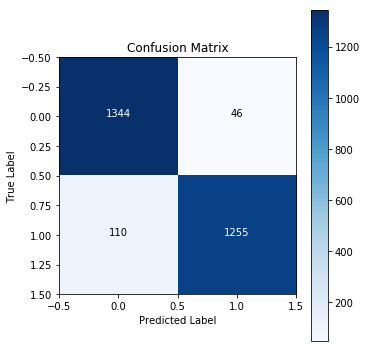

In [72]:
import matplotlib.pyplot as plt

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test.argmax(axis=1), y_pre.argmax(axis=1))

plt.figure(figsize= (5, 5))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


thresh = cm.max() / 2.
for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [73]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1390
           1       0.96      0.92      0.94      1365

   micro avg       0.97      0.92      0.95      2755
   macro avg       0.97      0.92      0.95      2755
weighted avg       0.97      0.92      0.95      2755
 samples avg       0.92      0.92      0.92      2755



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


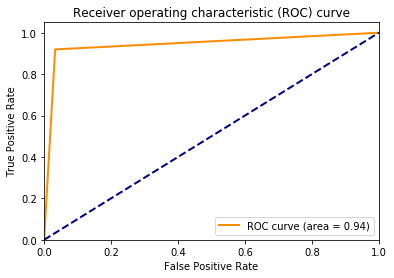

In [74]:
from sklearn.metrics import roc_curve, auc

# Assuming you have two arrays: y_true (true labels) and y_pred (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), y_pre.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# **Implementing MLP Classifer.**

In [75]:
from sklearn.neural_network import MLPClassifier


In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)

In [77]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [78]:
# Fit the model to the training data
history2=mlp.fit(x_train, y_train)

In [79]:
y_pred2 = mlp.predict(x_test)

In [80]:
print(y_pred2)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [81]:
test_acc = mlp.score(x_test, y_test)

In [82]:
print(test_acc)

0.6845735027223231


In [83]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1390
           1       0.70      0.65      0.67      1365

   micro avg       0.69      0.68      0.69      2755
   macro avg       0.69      0.68      0.68      2755
weighted avg       0.69      0.68      0.68      2755
 samples avg       0.68      0.68      0.68      2755



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


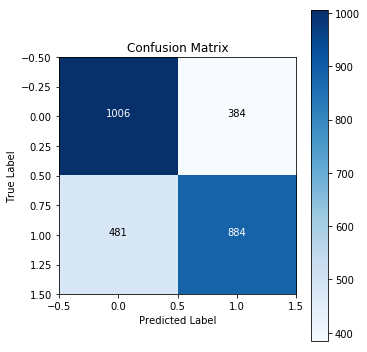

In [84]:
cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))

plt.figure(figsize= (5, 5))
plt.imshow(cm2, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


thresh = cm2.max() / 2.
for i in range (cm2.shape[0]):
    for j in range (cm2.shape[1]):
        plt.text(j, i, cm2[i, j], horizontalalignment= 'center', color= 'white' if cm2[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

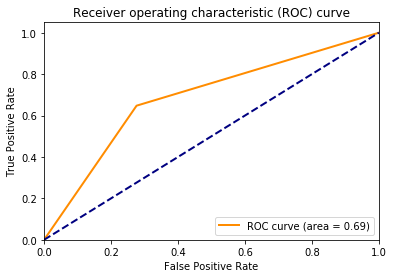

In [85]:
fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), y_pred2.argmax(axis=1))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()